<a href="https://colab.research.google.com/github/aboelela924/tensorFlowTutorials/blob/master/BasicClassificationgTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow_datasets as tfds 
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [54]:
train_x = train_x[:, None] / 255.0
test_x = test_x[:, None] / 255.0
train_x = train_x.reshape(train_x.shape[0], train_x.shape[2], train_x.shape[3], train_x.shape[1])
test_x = test_x.reshape(test_x.shape[0], test_x.shape[2], test_x.shape[3], test_x.shape[1])

In [55]:
print(test_x.shape)

(10000, 28, 28, 1)


In [16]:
classes_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]

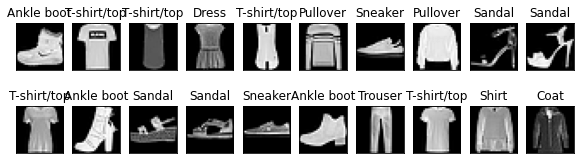

In [31]:
plt.figure(figsize=(10,15))
for i, image in enumerate(train_x[:20]):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap="gray")
    plt.title(classes_names[train_y[i]])
plt.show()

In [56]:
model = keras.Sequential([
                          layers.Conv2D(16, 3, padding="same", activation="relu",input_shape=(28,28,1)),
                          layers.MaxPool2D(pool_size=(2,2), padding="same", strides=2),
                          layers.Conv2D(32, 3, padding="same", activation="relu"),
                          layers.MaxPool2D(pool_size=(2,2), padding="same", strides=2),
                          layers.Conv2D(64, 3, padding="same", activation="relu"),
                          layers.MaxPool2D(pool_size=(2,2), padding="same", strides=2),
                          layers.Conv2D(128, 3, padding="same", activation="relu"),
                          layers.MaxPool2D(pool_size=(2,2), padding="same", strides=2),
                          layers.Conv2D(256, 3, padding="same", activation="relu"),
                          layers.MaxPool2D(pool_size=(2,2), padding="same", strides=2),
                          layers.Flatten(),
                          layers.Dropout(0.5),
                          layers.Dense(128, activation="relu"),
                          layers.Dropout(0.6),
                          layers.Dense(10, activation="softmax")

])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
model.compile(optimizer="adam", 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

checkpoint_path ="/content/saved_models"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, verbose=1, save_best_only=True)


history =  model.fit(x=train_x, y=train_y, batch_size=64, epochs=15,
                     verbose=2,callbacks=checkpoint, validation_split=0.1)

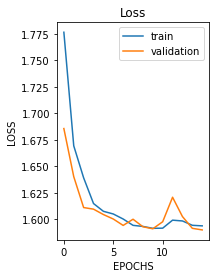

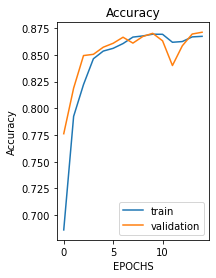

In [69]:
his = history.history
train_loss = his["loss"]
train_acc = his["accuracy"]
val_loss = his["val_loss"]
val_acc = his["val_accuracy"]

plt.subplot(1,2,1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Loss")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title("Accuracy")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [70]:
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)

313/313 - 1s - loss: 1.5978 - accuracy: 0.8632


In [75]:
def process_test_image(image):
    image = image[None, :]
    return image

In [116]:
def predict_and_plot(image, true_label, model, plot_prediction=False):
    prediction = model.predict(process_test_image(image))
    print(prediction)
    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.imshow(np.squeeze(image), cmap="gray")
    plt.title("{} {:2.0f}% ({})".format(classes_names[predicted_label],
                                100*np.max(prediction),
                                classes_names[true_label]),
                                color=color)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    if plot_prediction:
        plot_prediction_vector(prediction, true_label)


def plot_prediction_vector(v, true_label):
    v = np.squeeze(v)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), v, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(v)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


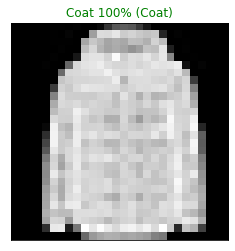

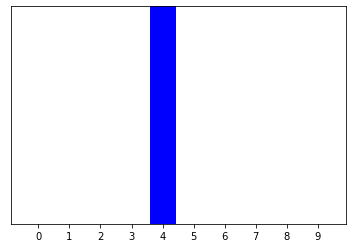

In [120]:
# print(process_test_image(test_x[1]).shape)
predict_and_plot(test_x[210], test_y[210], model, plot_prediction=True)